In [2]:
import pandas as pd
pd.set_option('display.float_format', '{:.6f}'.format)  # Show 6 decimal places
from pymongo import MongoClient
import os
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=14,5
pd.set_option('display.max_columns', None)



In [3]:
complete_df =  pd.read_parquet(r"D:\Deployment\jpdcl_load_forecasting\dags\data\ingestion_data_dir\HT_meter_complete_data_9_id.parquet")
complete_df = complete_df[['Clock','R_Voltage', 'Y_Voltage', 'B_Voltage', 'R_Current', 'Y_Current', 'B_Current', 'KWh', 'location_id']]
complete_df

,Clock,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,location_id
0,2024-07-03 00:00:00.0,98.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb0e00fa93.57742868
1,2024-07-03 00:00:00.0,98.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb08653184.63221826
2,2024-07-03 00:00:00.0,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66839476c390a1.17209242
3,2024-07-03 00:00:00.0,98.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb1329b903.76893720
4,2024-07-03 00:30:00.0,97.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb0e00fa93.57742868
...,...,...,...,...,...,...,...,...,...
18735312,2025-05-09 11:00:00.0,57.700000,57.700000,57.400000,0.270000,0.280000,0.310000,0.024000,66a470da01a7c7.72374210
18735313,2025-05-09 11:00:00.0,59.800000,59.700000,59.700000,1.280000,1.120000,1.130000,0.100000,668e7a3cac2e03.76907011
18735314,2025-05-09 11:00:00.0,57.800000,57.700000,57.900000,0.050000,0.030000,0.040000,0.004000,66b48d2b161f82.20926859
18735315,2025-05-09 11:00:00.0,57.700000,57.700000,57.400000,0.000000,0.000000,0.000000,0.000000,66a470d5de3e13.14141048


In [4]:
grouped_df = complete_df.groupby(['location_id'])
i = 1
limit = 11
data_lst = []
for id, data in grouped_df:
	if i==limit:
		break
	print(f"{i} Processing location_id: {id}, {len(data)} records")
	data_lst.append(data)
	i += 1

df = pd.concat(data_lst, ignore_index=True)
df


1 Processing location_id: ('305030100001',), 11529 records
2 Processing location_id: ('305030100002',), 13557 records
3 Processing location_id: ('305030100003',), 13435 records
4 Processing location_id: ('305030100004',), 13547 records
5 Processing location_id: ('305030100005',), 13549 records
6 Processing location_id: ('305030100006',), 13559 records
7 Processing location_id: ('305030100007',), 13526 records
8 Processing location_id: ('305030100008',), 1127 records
9 Processing location_id: ('667bd5b54b3451.15328311',), 13511 records
10 Processing location_id: ('667bd5ff224136.74559203',), 13559 records


,Clock,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,location_id
0,2024-07-31 00:00:00.0,58.000000,58.000000,57.200000,0.260000,0.250000,0.250000,0.013000,305030100001
1,2024-07-31 00:30:00.0,57.900000,57.900000,57.100000,0.260000,0.260000,0.250000,0.013000,305030100001
2,2024-07-31 01:00:00.0,57.800000,57.700000,56.900000,0.260000,0.250000,0.240000,0.013000,305030100001
3,2024-07-31 01:30:00.0,58.100000,57.900000,57.200000,0.250000,0.250000,0.240000,0.012000,305030100001
4,2024-07-31 02:00:00.0,58.000000,57.900000,57.200000,0.250000,0.240000,0.240000,0.013000,305030100001
...,...,...,...,...,...,...,...,...,...
120894,2025-05-09 09:00:00.0,55.600000,55.600000,55.000000,1.610000,1.690000,1.590000,0.133000,667bd5ff224136.74559203
120895,2025-05-09 09:30:00.0,56.100000,56.300000,55.600000,0.200000,0.210000,0.200000,0.017000,667bd5ff224136.74559203
120896,2025-05-09 10:00:00.0,54.900000,55.000000,54.300000,1.850000,1.830000,1.790000,0.147000,667bd5ff224136.74559203
120897,2025-05-09 10:30:00.0,54.800000,54.900000,54.300000,1.790000,1.790000,1.730000,0.142000,667bd5ff224136.74559203


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120899 entries, 0 to 120898
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Clock        120899 non-null  object 
 1   R_Voltage    120899 non-null  float64
 2   Y_Voltage    120899 non-null  float64
 3   B_Voltage    120899 non-null  float64
 4   R_Current    120899 non-null  float64
 5   Y_Current    120899 non-null  float64
 6   B_Current    120899 non-null  float64
 7   KWh          120899 non-null  float64
 8   location_id  120899 non-null  object 
dtypes: float64(7), object(2)
memory usage: 8.3+ MB


In [5]:
df.columns

Index(['Clock', 'R_Voltage', 'Y_Voltage', 'B_Voltage', 'R_Current',
       'Y_Current', 'B_Current', 'KWh', 'location_id'],
      dtype='object')

In [6]:

sensor_df = pd.read_parquet(r"D:\Deployment\jpdcl_load_forecasting\dags\data\ingestion_data_dir\sensor_data.parquet")
sensor_df = sensor_df[sensor_df['admin_status'] != "N"]
sensor_df = sensor_df[['location_id', 'site_id', 'meter_ct_mf','meter_load_mf','meter_volt_mf']]
for col in ['meter_ct_mf', 'meter_load_mf', 'meter_volt_mf']:
	sensor_df[col] = pd.to_numeric(sensor_df[col], errors='coerce')

sensor_df

,location_id,site_id,meter_ct_mf,meter_load_mf,meter_volt_mf
0,305030100002,667572f85ded75.67576759,60.000000,6000.000000,100.000000
1,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2,305030100007,667572f85ded75.67576759,60.000000,6000.000000,100.000000
3,305030100003,667572f85ded75.67576759,120.000000,12000.000000,100.000000
4,305030100008,667572f85ded75.67576759,80.000000,8000.000000,100.000000
...,...,...,...,...,...
1982,6799ef31e668f9.99534736,6680e0b51934d8.15669586,80.000000,80.000000,1.000000
1983,67a068a5e6bc72.45420420,6680e47b643896.02283028,160.000000,160.000000,1.000000
1984,67a1d2a0e138d8.65186067,677c00e7021482.37685086,10.000000,10.000000,1.000000
1985,67a1e9fdee50d5.99419372,6680e0b51934d8.15669586,40.000000,40.000000,1.000000


In [7]:
# sensor_df[['meter_ct_mf','meter_load_mf','meter_volt_mf']] = sensor_df[['meter_ct_mf','meter_load_mf','meter_volt_mf']].astype(float)
sensor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location_id    1987 non-null   object 
 1   site_id        1987 non-null   object 
 2   meter_ct_mf    1987 non-null   float64
 3   meter_load_mf  1987 non-null   float64
 4   meter_volt_mf  1987 non-null   float64
dtypes: float64(3), object(2)
memory usage: 77.7+ KB


In [8]:
print(sensor_df.isna().sum())

location_id      0
site_id          0
meter_ct_mf      0
meter_load_mf    0
meter_volt_mf    0
dtype: int64


In [9]:
from concurrent.futures import ProcessPoolExecutor
 
new_df = df.merge(sensor_df, on='location_id', how='left')
new_df
# location_groups = [group for _, group in df.groupby("location_id")]

# with ProcessPoolExecutor() as executor:
# 	results = list(executor.map(lambda g: process_location_data(g['location_id'].iloc[0], g), location_groups))


,Clock,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,location_id,site_id,meter_ct_mf,meter_load_mf,meter_volt_mf
0,2024-07-31 00:00:00.0,58.000000,58.000000,57.200000,0.260000,0.250000,0.250000,0.013000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
1,2024-07-31 00:30:00.0,57.900000,57.900000,57.100000,0.260000,0.260000,0.250000,0.013000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2,2024-07-31 01:00:00.0,57.800000,57.700000,56.900000,0.260000,0.250000,0.240000,0.013000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
3,2024-07-31 01:30:00.0,58.100000,57.900000,57.200000,0.250000,0.250000,0.240000,0.012000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
4,2024-07-31 02:00:00.0,58.000000,57.900000,57.200000,0.250000,0.240000,0.240000,0.013000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120894,2025-05-09 09:00:00.0,55.600000,55.600000,55.000000,1.610000,1.690000,1.590000,0.133000,667bd5ff224136.74559203,667997aaa85681.59292546,80.000000,8000.000000,100.000000
120895,2025-05-09 09:30:00.0,56.100000,56.300000,55.600000,0.200000,0.210000,0.200000,0.017000,667bd5ff224136.74559203,667997aaa85681.59292546,80.000000,8000.000000,100.000000
120896,2025-05-09 10:00:00.0,54.900000,55.000000,54.300000,1.850000,1.830000,1.790000,0.147000,667bd5ff224136.74559203,667997aaa85681.59292546,80.000000,8000.000000,100.000000
120897,2025-05-09 10:30:00.0,54.800000,54.900000,54.300000,1.790000,1.790000,1.730000,0.142000,667bd5ff224136.74559203,667997aaa85681.59292546,80.000000,8000.000000,100.000000


In [83]:
new_df2 = complete_df.merge(sensor_df, on='location_id', how='left')
new_df2

,Clock,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,location_id,site_id,meter_ct_mf,meter_load_mf,meter_volt_mf
0,2024-07-03 00:00:00.0,98.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb0e00fa93.57742868,667ef79aea76d3.68988463,80.000000,8000.000000,100.000000
1,2024-07-03 00:00:00.0,98.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb08653184.63221826,667ef79aea76d3.68988463,80.000000,8000.000000,100.000000
2,2024-07-03 00:00:00.0,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66839476c390a1.17209242,667ef79aea76d3.68988463,80.000000,8000.000000,100.000000
3,2024-07-03 00:00:00.0,98.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb1329b903.76893720,667ef79aea76d3.68988463,60.000000,6000.000000,100.000000
4,2024-07-03 00:30:00.0,97.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb0e00fa93.57742868,667ef79aea76d3.68988463,80.000000,8000.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18735312,2025-05-09 11:00:00.0,57.700000,57.700000,57.400000,0.270000,0.280000,0.310000,0.024000,66a470da01a7c7.72374210,667efa6dea07c1.12808706,60.000000,6000.000000,100.000000
18735313,2025-05-09 11:00:00.0,59.800000,59.700000,59.700000,1.280000,1.120000,1.130000,0.100000,668e7a3cac2e03.76907011,66839d63439b84.10303622,40.000000,4000.000000,100.000000
18735314,2025-05-09 11:00:00.0,57.800000,57.700000,57.900000,0.050000,0.030000,0.040000,0.004000,66b48d2b161f82.20926859,667efe0822ad24.46682375,80.000000,8000.000000,100.000000
18735315,2025-05-09 11:00:00.0,57.700000,57.700000,57.400000,0.000000,0.000000,0.000000,0.000000,66a470d5de3e13.14141048,667efa6dea07c1.12808706,60.000000,6000.000000,100.000000


In [53]:
new_df2.isna().sum()

Clock                 0
R_Voltage             0
Y_Voltage             0
B_Voltage             0
R_Current             0
Y_Current             0
B_Current             0
KWh                   0
location_id           0
site_id          142516
meter_ct_mf      142516
meter_load_mf    142516
meter_volt_mf    142516
dtype: int64

In [57]:
null = new_df2[new_df2['site_id'].isnull()]
null['location_id'].nunique()

47

In [58]:
new_df2.dropna(inplace=True)
new_df2

,Clock,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,location_id,site_id,meter_ct_mf,meter_load_mf,meter_volt_mf
0,2024-07-03 00:00:00.0,98.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb0e00fa93.57742868,667ef79aea76d3.68988463,80.0000,8000.0000,100.0000
1,2024-07-03 00:00:00.0,98.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb08653184.63221826,667ef79aea76d3.68988463,80.0000,8000.0000,100.0000
2,2024-07-03 00:00:00.0,98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66839476c390a1.17209242,667ef79aea76d3.68988463,80.0000,8000.0000,100.0000
3,2024-07-03 00:00:00.0,98.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb1329b903.76893720,667ef79aea76d3.68988463,60.0000,6000.0000,100.0000
4,2024-07-03 00:30:00.0,97.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6684eb0e00fa93.57742868,667ef79aea76d3.68988463,80.0000,8000.0000,100.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18735312,2025-05-09 11:00:00.0,57.700000,57.700000,57.400000,0.270000,0.280000,0.310000,0.024000,66a470da01a7c7.72374210,667efa6dea07c1.12808706,60.0000,6000.0000,100.0000
18735313,2025-05-09 11:00:00.0,59.800000,59.700000,59.700000,1.280000,1.120000,1.130000,0.100000,668e7a3cac2e03.76907011,66839d63439b84.10303622,40.0000,4000.0000,100.0000
18735314,2025-05-09 11:00:00.0,57.800000,57.700000,57.900000,0.050000,0.030000,0.040000,0.004000,66b48d2b161f82.20926859,667efe0822ad24.46682375,80.0000,8000.0000,100.0000
18735315,2025-05-09 11:00:00.0,57.700000,57.700000,57.400000,0.000000,0.000000,0.000000,0.000000,66a470d5de3e13.14141048,667efa6dea07c1.12808706,60.0000,6000.0000,100.0000


In [ ]:
new_df2.isna().sum()

Clock            0
R_Voltage        0
Y_Voltage        0
B_Voltage        0
R_Current        0
Y_Current        0
B_Current        0
KWh              0
location_id      0
site_id          0
meter_ct_mf      0
meter_load_mf    0
meter_volt_mf    0
dtype: int64

In [68]:
# for id , data in new_df2.groupby("location_id"):
location_groups = [group for _, group in new_df.groupby("location_id")]
len(location_groups)

10

In [ ]:
with ProcessPoolExecutor(max_workers=4) as executor:
	results = list(executor.map(lambda g: process_location_data(g['location_id'].iloc[0], g), location_groups))


1510

In [62]:
complete_df['location_id'].nunique()

1557

In [10]:
def basic_dataframe_checks(df):
	print(f"df rows: {len(df)}")
	print(f"\nnull values: \n{df.isnull().sum()}")
	print(f"\nDuplicated rows: {df.duplicated().sum()}")
	# df.set_index("Clock", drop=True, inplace=True)
	print(f"\nDuplicated rows after datetime index: {df.duplicated().sum()}")
	print(f"\ninfo: {df.info()}")
	print(f"\ndescription: {df.describe()}")

basic_dataframe_checks(df)


df rows: 120899

null values: 
Clock          0
R_Voltage      0
Y_Voltage      0
B_Voltage      0
R_Current      0
Y_Current      0
B_Current      0
KWh            0
location_id    0
dtype: int64

Duplicated rows: 0

Duplicated rows after datetime index: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120899 entries, 0 to 120898
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Clock        120899 non-null  object 
 1   R_Voltage    120899 non-null  float64
 2   Y_Voltage    120899 non-null  float64
 3   B_Voltage    120899 non-null  float64
 4   R_Current    120899 non-null  float64
 5   Y_Current    120899 non-null  float64
 6   B_Current    120899 non-null  float64
 7   KWh          120899 non-null  float64
 8   location_id  120899 non-null  object 
dtypes: float64(7), object(2)
memory usage: 8.3+ MB

info: None

description:           R_Voltage     Y_Voltage     B_Voltage     R_Current     Y_Current  \
co

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120899 entries, 0 to 120898
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Clock          120899 non-null  object 
 1   R_Voltage      120899 non-null  float64
 2   Y_Voltage      120899 non-null  float64
 3   B_Voltage      120899 non-null  float64
 4   R_Current      120899 non-null  float64
 5   Y_Current      120899 non-null  float64
 6   B_Current      120899 non-null  float64
 7   KWh            120899 non-null  float64
 8   location_id    120899 non-null  object 
 9   site_id        120899 non-null  object 
 10  meter_ct_mf    120899 non-null  float64
 11  meter_load_mf  120899 non-null  float64
 12  meter_volt_mf  120899 non-null  float64
dtypes: float64(10), object(3)
memory usage: 12.0+ MB


In [12]:
def process_location_data(df_loc):
    # Example transformations (replace with your logic)
    df_loc['R_Voltage'] *= df_loc['meter_volt_mf']
    df_loc['Y_Voltage'] *= df_loc['meter_volt_mf']
    df_loc['B_Voltage'] *= df_loc['meter_volt_mf']

    df_loc['R_Current'] *= df_loc['meter_ct_mf']
    df_loc['Y_Current'] *= df_loc['meter_ct_mf']
    df_loc['B_Current'] *= df_loc['meter_ct_mf']

    df_loc['KWh'] *= df_loc['meter_load_mf']


    return df_loc


def voltage_current_load_validation(df):
	try:
		non_negative_cols = ['R_Voltage', 'Y_Voltage', 'B_Voltage','R_Current', 'Y_Current', 'B_Current', 'KWh']
		voltage_cols = ['R_Voltage', 'Y_Voltage', 'B_Voltage']
		current_cols = ['R_Current', 'Y_Current', 'B_Current']

		# --- Condition 1 ---
		any_voltage_zero = (df[voltage_cols] == 0).any(axis=1)
		any_current_nonzero = (df[current_cols] != 0).any(axis=1)

		condition_1 = any_voltage_zero & any_current_nonzero

		# --- Condition 2 ---
		all_current_nonzero = (df[current_cols] != 0).all(axis=1)
		kwh_zero = (df['KWh'] == 0)

		condition_2 = all_current_nonzero & kwh_zero

		# --- Condition 3: No negatives ---
		no_negatives = (df[non_negative_cols] >= 0).all(axis=1)

		final_condition = (condition_1 | condition_2) & no_negatives
		# filtered_df = df[final_condition].copy()
		cleaned_df = df[~final_condition].copy()

		return cleaned_df
	except Exception as e:
		print(f"Error in voltage_current_load_validation: {e}")
		return pd.DataFrame()


In [21]:
from concurrent.futures import ProcessPoolExecutor, as_completed
import multiprocessing

def process_location_wrapper(group):
    id, data = group
    try:
        print(f"Processing location_id: {id}, {len(data)} records")
        data['Clock'] = pd.to_datetime(data['Clock'])
        data = data.set_index("Clock", drop=True).sort_index()
        data = process_location_data(data)
        clean_dataset = voltage_current_load_validation(data)
        resampled_dataset = clean_dataset[['KWh']].resample('30min').asfreq()
        # resampled_dataset['KWh'].plot()
        # plt.show()

        return resampled_dataset
    except Exception as e:
        print(f"Error processing location_id {id}: {e}", exc_info=True)
        return pd.DataFrame()  # Return empty DataFrame on error

# Assuming `new_df` is already defined
location_groups = [(id, data.copy()) for id, data in new_df.groupby('location_id')]

# Set max_workers = number of CPU cores or as desired
max_workers = min(4, multiprocessing.cpu_count())  # Adjust 4 if needed

results = []
with ProcessPoolExecutor(max_workers=max_workers) as executor:
    futures = [executor.submit(process_location_wrapper, group) for group in location_groups]

    for future in as_completed(futures):
        result = future.result()
        if not result.empty:
            results.append(result)

# Combine all results
clean_data_set = pd.concat(results, ignore_index=False)


BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [22]:
location_groups = [(id, data.copy()) for id, data in new_df.groupby('location_id')]


In [27]:
for g in location_groups:
    id, data = g
    print(id, len(data))

305030100001 11529
305030100002 13557
305030100003 13435
305030100004 13547
305030100005 13549
305030100006 13559
305030100007 13526
305030100008 1127
667bd5b54b3451.15328311 13511
667bd5ff224136.74559203 13559


In [26]:
len(location_groups[0:5])

5

Processing location_id: 305030100001, 11529 records
len(data): 11529


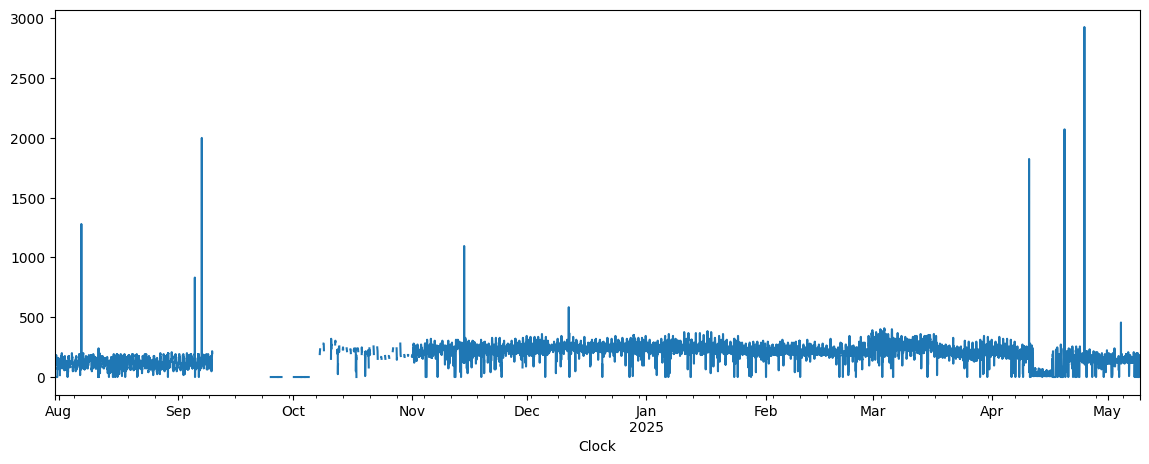

Processing location_id: 305030100002, 13557 records
len(data): 13557


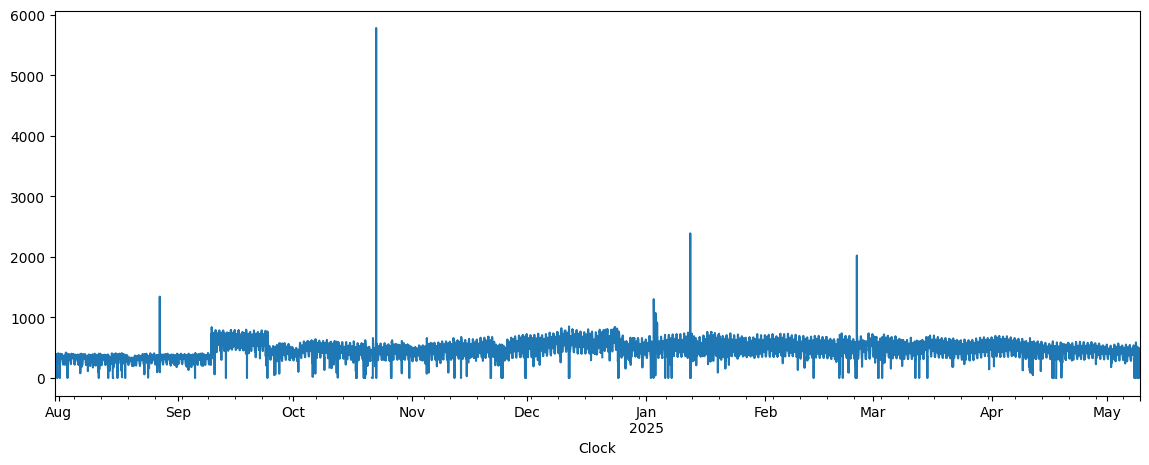

Processing location_id: 305030100003, 13435 records
len(data): 13435


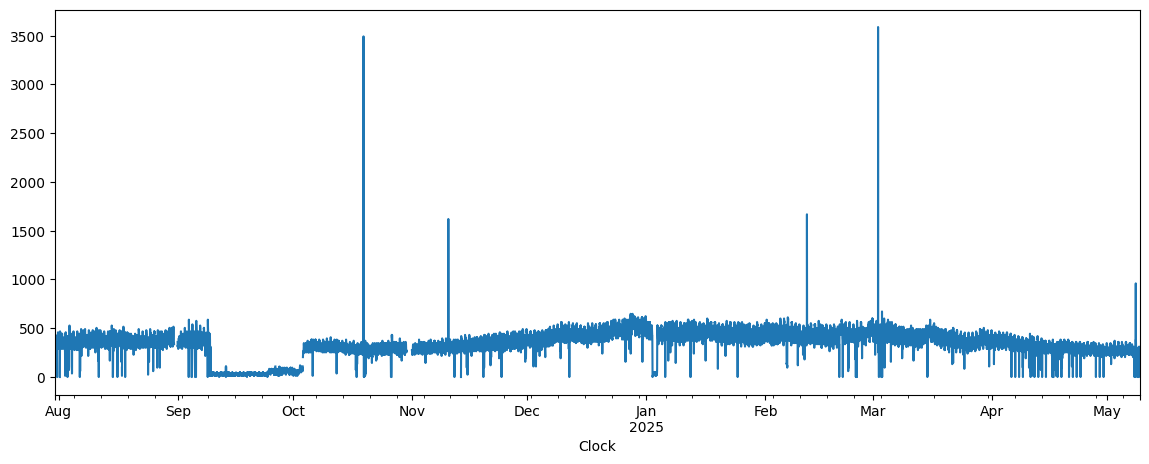

Processing location_id: 305030100004, 13547 records
len(data): 13547


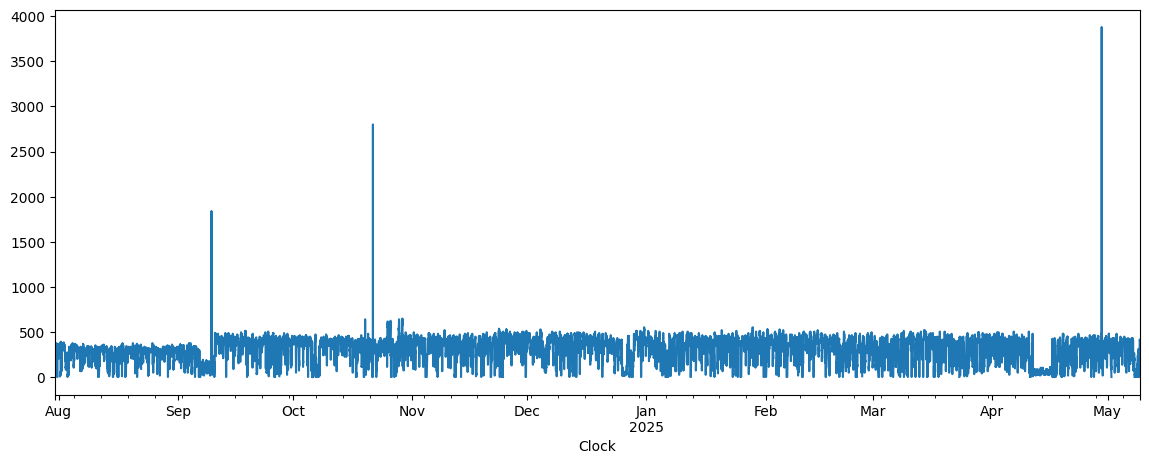

Processing location_id: 305030100005, 13549 records
len(data): 13549


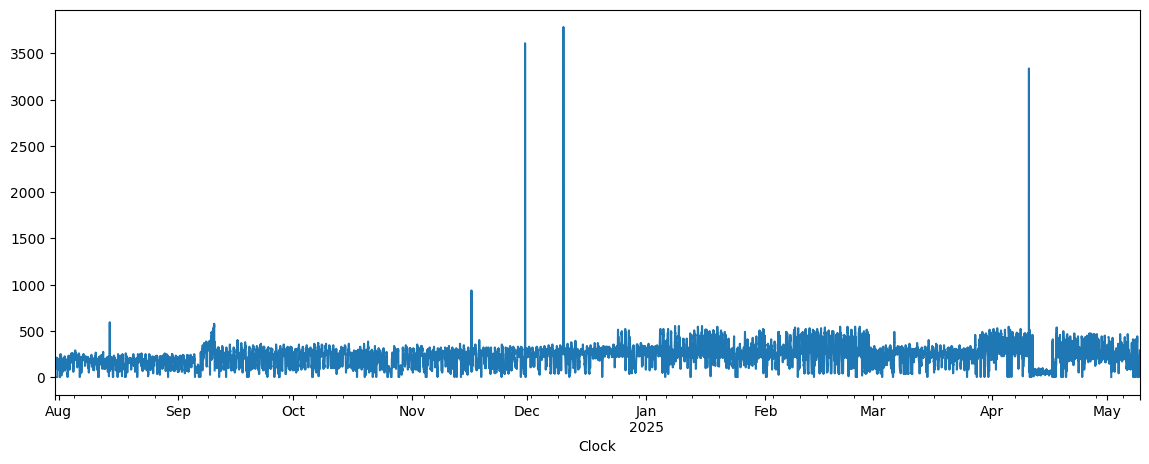

Processing location_id: 305030100006, 13559 records
len(data): 13559


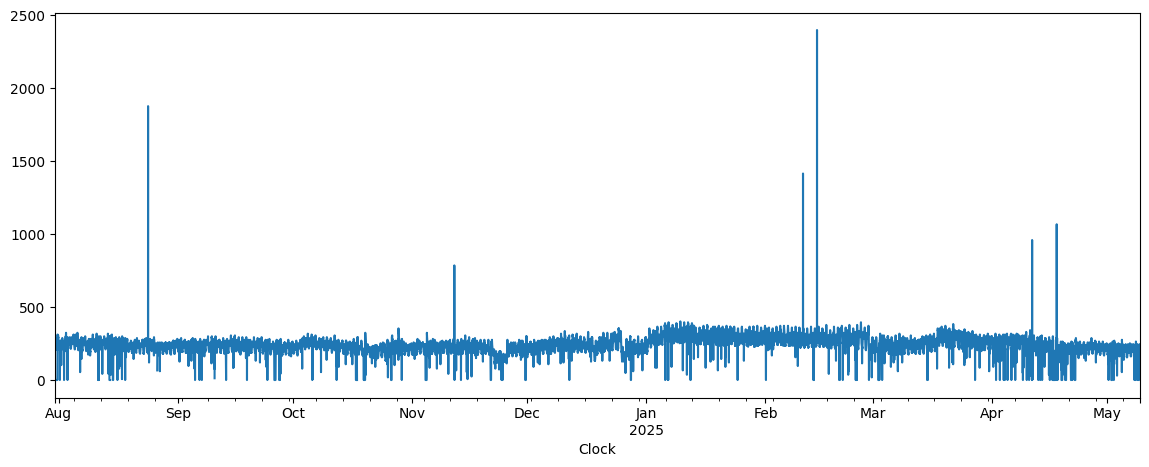

Processing location_id: 305030100007, 13526 records
len(data): 13526


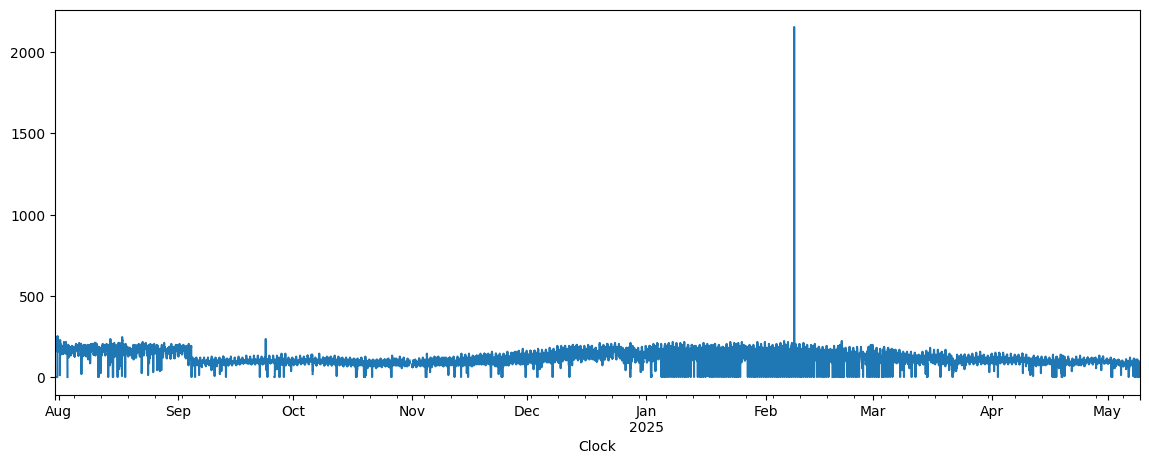

Processing location_id: 305030100008, 1127 records
len(data): 1127


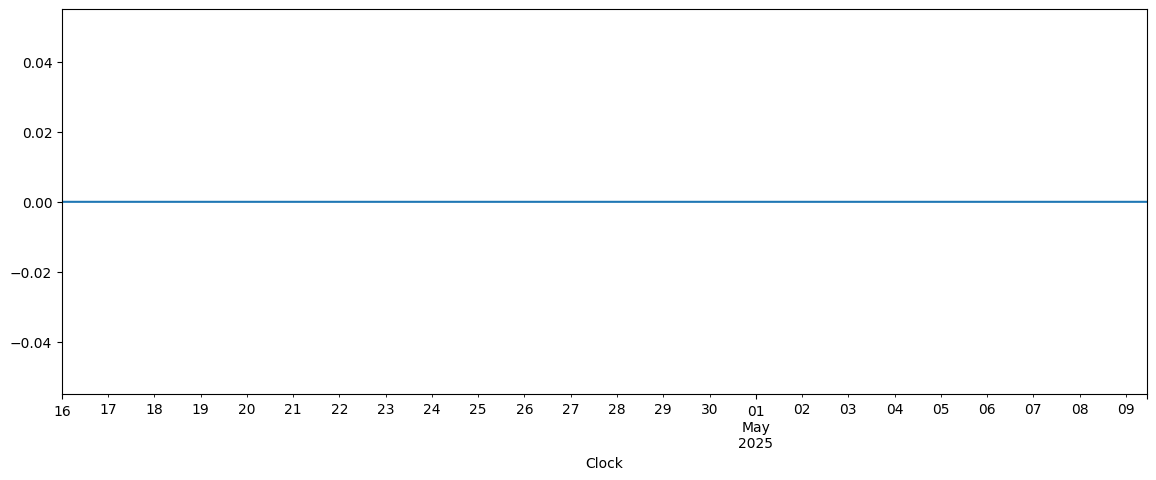

Processing location_id: 667bd5b54b3451.15328311, 13511 records
len(data): 13511


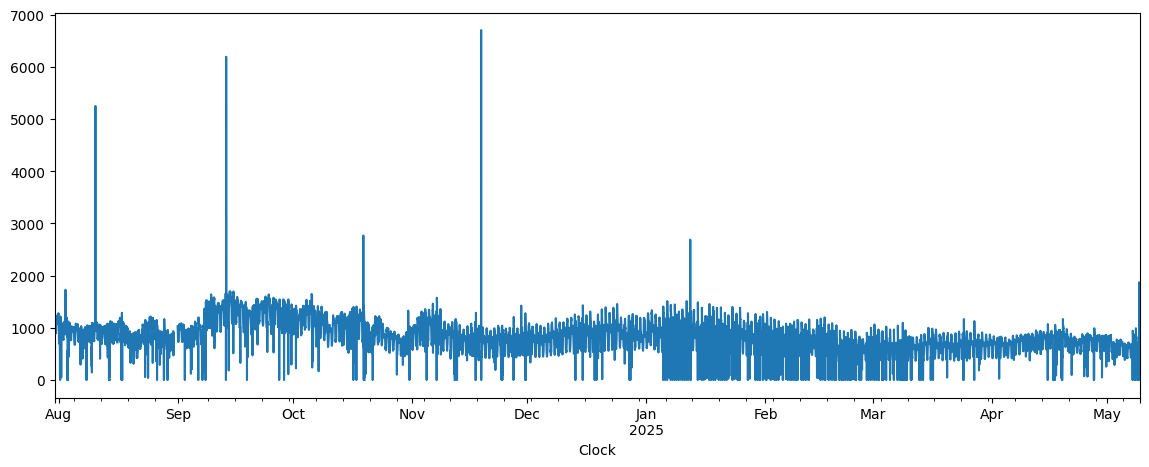

Processing location_id: 667bd5ff224136.74559203, 13559 records
len(data): 13559


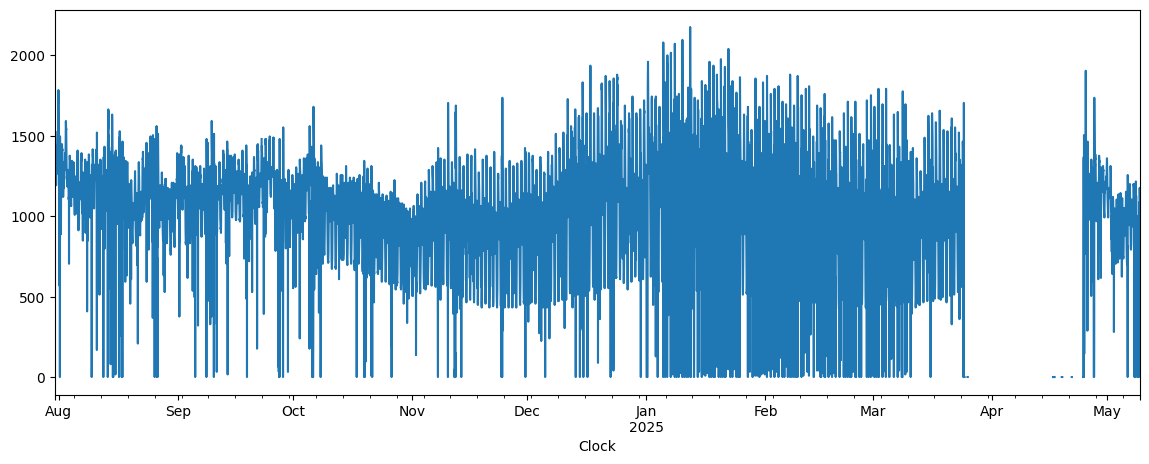

In [20]:
data_lst = []
for id , data in new_df.groupby('location_id'):
	print(f"Processing location_id: {id}, {len(data)} records")
	data['Clock'] = pd.to_datetime(data['Clock'])
	data.set_index("Clock", drop=True, inplace=True)
	data = data.sort_index()
	print(f"len(data): {len(data)}")
	data = process_location_data(data)
	clean_dataset = voltage_current_load_validation(data)
	resampled_dataset = clean_dataset[['KWh']].resample('30min').asfreq()
	resampled_dataset['KWh'].plot()
	plt.show()

	data_lst.append(clean_dataset)
clean_data_set = pd.concat(data_lst, ignore_index=False)


In [14]:
clean_data_set

,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,location_id,site_id,meter_ct_mf,meter_load_mf,meter_volt_mf
Clock,,,,,,,,,,,,
2024-07-31 00:00:00.0,5800.000000,5800.000000,5720.000000,20.800000,20.000000,20.000000,104.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-07-31 00:30:00.0,5790.000000,5790.000000,5710.000000,20.800000,20.800000,20.000000,104.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-07-31 01:00:00.0,5780.000000,5770.000000,5690.000000,20.800000,20.000000,19.200000,104.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-07-31 01:30:00.0,5810.000000,5790.000000,5720.000000,20.000000,20.000000,19.200000,96.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-07-31 02:00:00.0,5800.000000,5790.000000,5720.000000,20.000000,19.200000,19.200000,104.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-09 09:00:00.0,5560.000000,5560.000000,5500.000000,128.800000,135.200000,127.200000,1064.000000,667bd5ff224136.74559203,667997aaa85681.59292546,80.000000,8000.000000,100.000000
2025-05-09 09:30:00.0,5610.000000,5630.000000,5560.000000,16.000000,16.800000,16.000000,136.000000,667bd5ff224136.74559203,667997aaa85681.59292546,80.000000,8000.000000,100.000000
2025-05-09 10:00:00.0,5490.000000,5500.000000,5430.000000,148.000000,146.400000,143.200000,1176.000000,667bd5ff224136.74559203,667997aaa85681.59292546,80.000000,8000.000000,100.000000


In [19]:
clean_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119308 entries, 2024-07-31 00:00:00.0 to 2025-05-09 11:00:00.0
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   R_Voltage      119308 non-null  float64
 1   Y_Voltage      119308 non-null  float64
 2   B_Voltage      119308 non-null  float64
 3   R_Current      119308 non-null  float64
 4   Y_Current      119308 non-null  float64
 5   B_Current      119308 non-null  float64
 6   KWh            119308 non-null  float64
 7   location_id    119308 non-null  object 
 8   site_id        119308 non-null  object 
 9   meter_ct_mf    119308 non-null  float64
 10  meter_load_mf  119308 non-null  float64
 11  meter_volt_mf  119308 non-null  float64
dtypes: float64(10), object(2)
memory usage: 15.9+ MB


In [18]:
clean_data_set[
    (clean_data_set['R_Voltage'] > 8000) |
    (clean_data_set['Y_Voltage'] > 8000) |
    (clean_data_set['B_Voltage'] > 8000)
]


,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,location_id,site_id,meter_ct_mf,meter_load_mf,meter_volt_mf
Clock,,,,,,,,,,,,
2024-09-25 05:00:00.0,11030.000000,11030.000000,11030.000000,0.000000,0.000000,0.000000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-09-25 05:30:00.0,11020.000000,11020.000000,11020.000000,0.000000,0.000000,0.000000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-09-25 06:00:00.0,11020.000000,11020.000000,11020.000000,0.000000,0.000000,0.000000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-09-25 06:30:00.0,11030.000000,11030.000000,11030.000000,0.000000,0.000000,0.000000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-09-25 07:00:00.0,11030.000000,11030.000000,11030.000000,0.000000,0.000000,0.000000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-04 17:00:00.0,0.000000,0.000000,10930.000000,0.000000,0.000000,0.000000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-10-04 17:30:00.0,0.000000,0.000000,10930.000000,0.000000,0.000000,0.000000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-10-04 18:00:00.0,0.000000,0.000000,10930.000000,0.000000,0.000000,0.000000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000


In [117]:
clean_data_set[clean_data_set['location_id']=="305030100001"].isna().sum()

R_Voltage        0
Y_Voltage        0
B_Voltage        0
R_Current        0
Y_Current        0
B_Current        0
KWh              0
location_id      0
site_id          0
meter_ct_mf      0
meter_load_mf    0
meter_volt_mf    0
dtype: int64

In [97]:
non_negative_cols = ['R_Voltage', 'Y_Voltage', 'B_Voltage','R_Current', 'Y_Current', 'B_Current', 'KWh']
voltage_cols = ['R_Voltage', 'Y_Voltage', 'B_Voltage']
current_cols = ['R_Current', 'Y_Current', 'B_Current']

# --- Condition 1 ---
any_voltage_zero = (clean_data_set[voltage_cols] == 0).any(axis=1)
any_current_nonzero = (clean_data_set[current_cols] != 0).any(axis=1)

condition_1 = any_voltage_zero & any_current_nonzero

# --- Condition 2 ---
all_current_nonzero = (clean_data_set[current_cols] != 0).all(axis=1)
kwh_zero = (clean_data_set['KWh'] == 0)

condition_2 = all_current_nonzero & kwh_zero

# --- Condition 3: No negatives ---
no_negatives = (clean_data_set[non_negative_cols] >= 0).all(axis=1)

final_condition = (condition_1 | condition_2) & no_negatives
filtered_df = clean_data_set[final_condition].copy()
filtered_df
# clean_data_set

,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,location_id,site_id,meter_ct_mf,meter_load_mf,meter_volt_mf
Clock,,,,,,,,,,,,
2024-08-01 07:00:00.0,6200.000000,6160.000000,6100.000000,24.000000,25.600000,25.600000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-08-11 12:00:00.0,6240.000000,6200.000000,6140.000000,20.800000,24.800000,23.200000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-08-15 15:00:00.0,6030.000000,5990.000000,5940.000000,0.800000,0.800000,0.800000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-08-24 06:30:00.0,6060.000000,6050.000000,5980.000000,20.000000,21.600000,21.600000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
2024-11-03 13:30:00.0,6380.000000,6429.999500,6500.000000,21.600000,23.200000,24.000000,0.000000,305030100001,667572f85ded75.67576759,80.000000,8000.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-24 14:30:00.0,0.000000,0.000000,5730.000000,40.000000,39.200000,37.600000,112.000000,667bd5ff224136.74559203,667997aaa85681.59292546,80.000000,8000.000000,100.000000
2025-04-24 15:00:00.0,0.000000,0.000000,5710.000000,18.400000,17.600000,17.600000,40.000000,667bd5ff224136.74559203,667997aaa85681.59292546,80.000000,8000.000000,100.000000
2025-04-24 15:30:00.0,0.000000,0.000000,5630.000000,131.200000,135.200000,130.400000,240.000000,667bd5ff224136.74559203,667997aaa85681.59292546,80.000000,8000.000000,100.000000


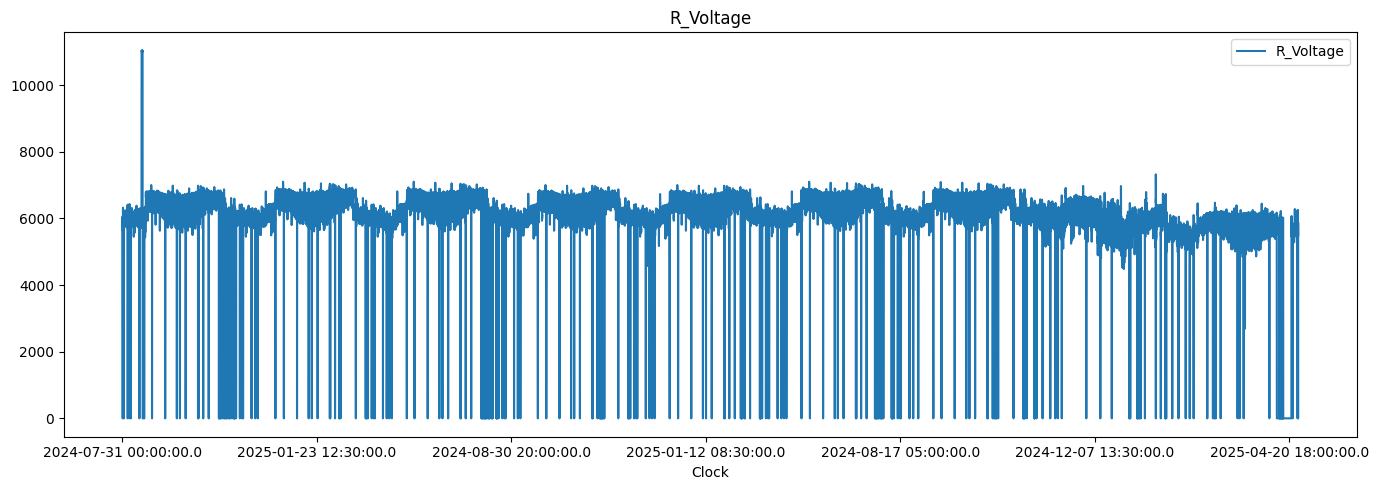

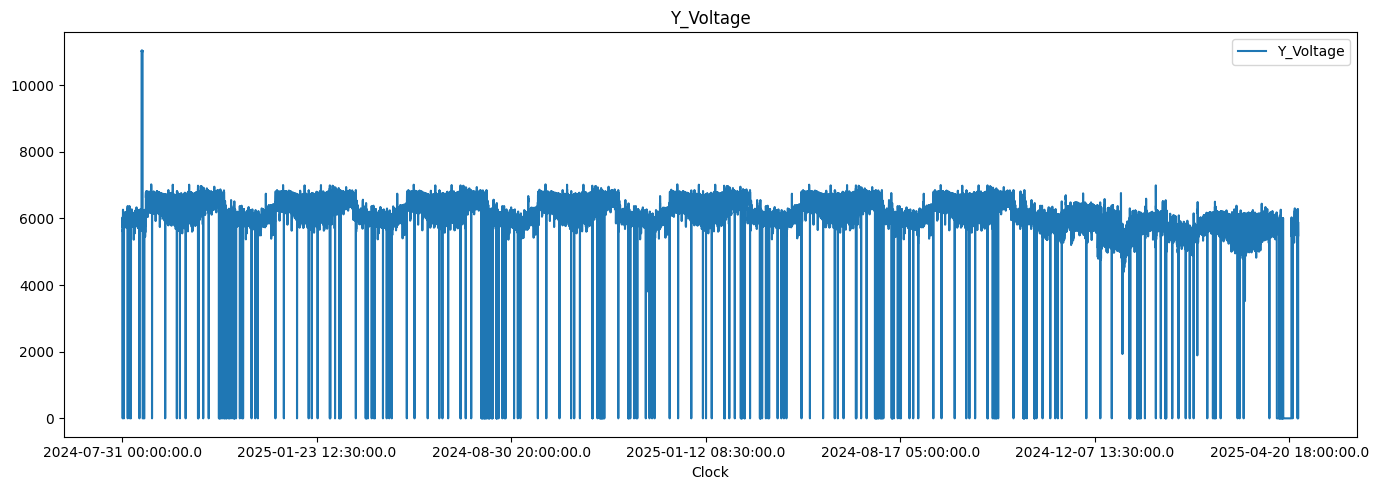

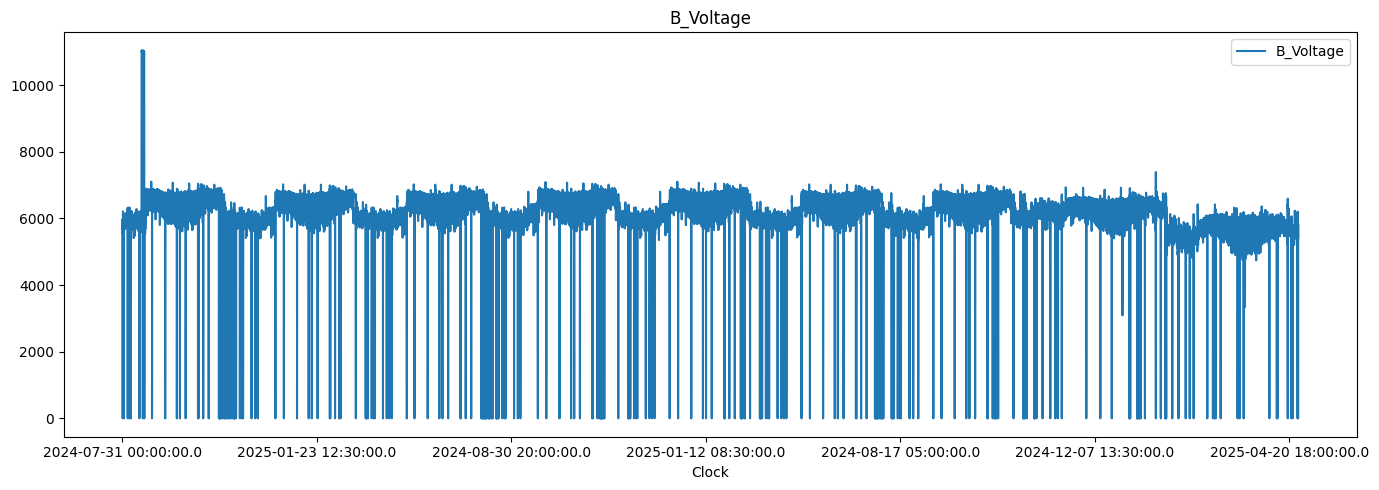

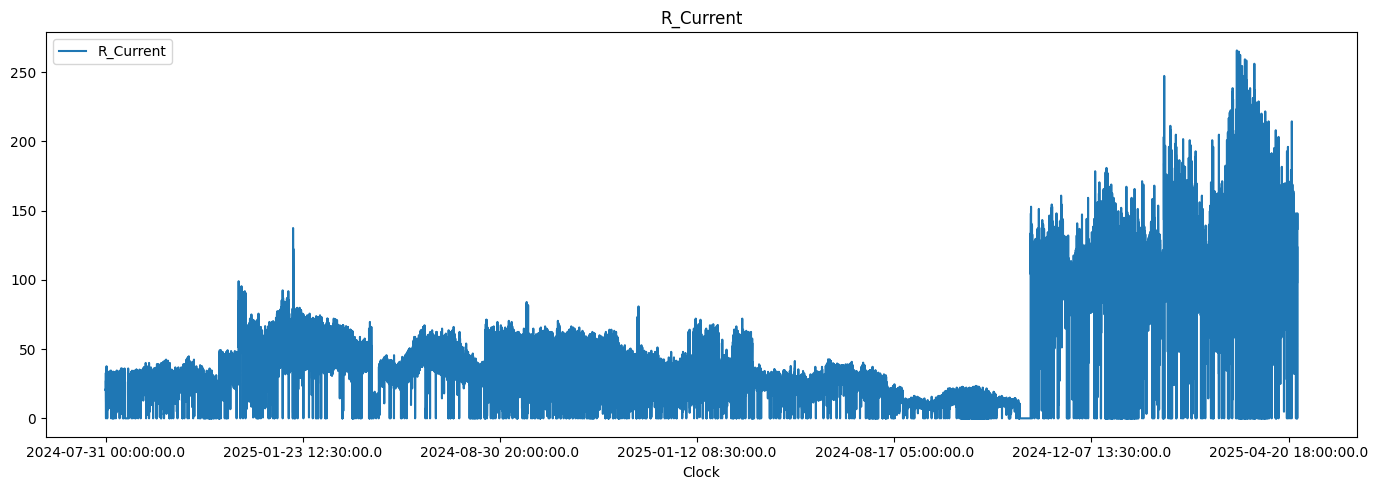

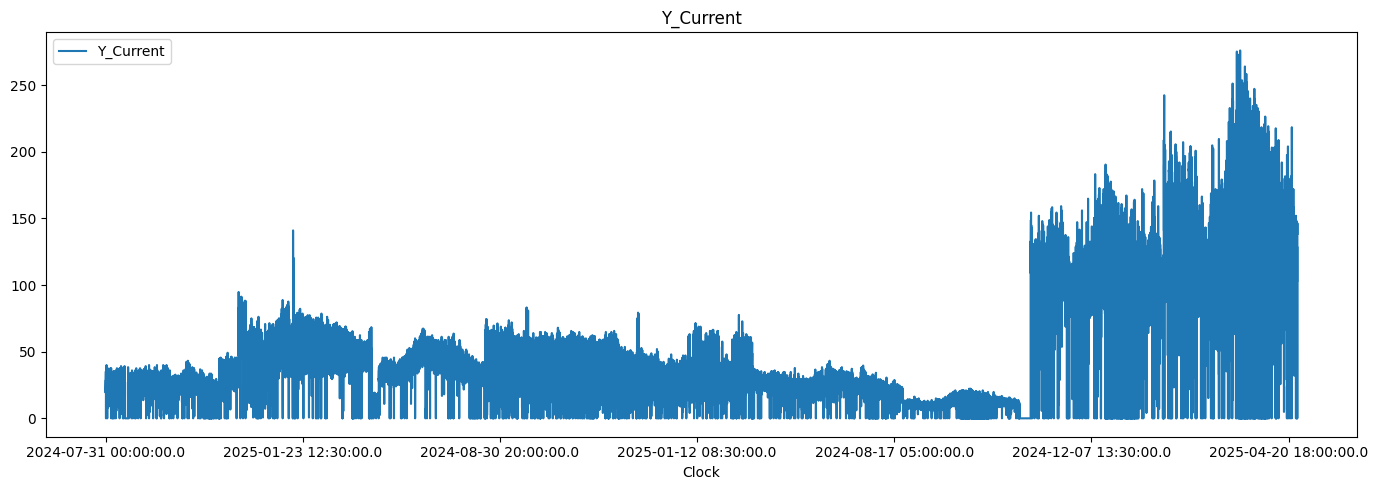

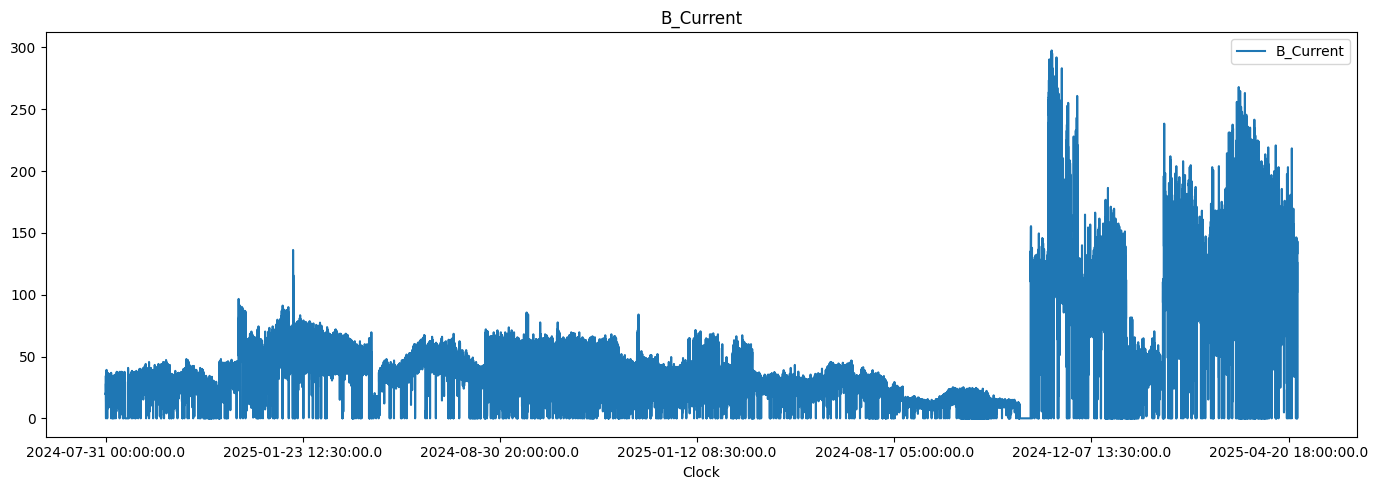

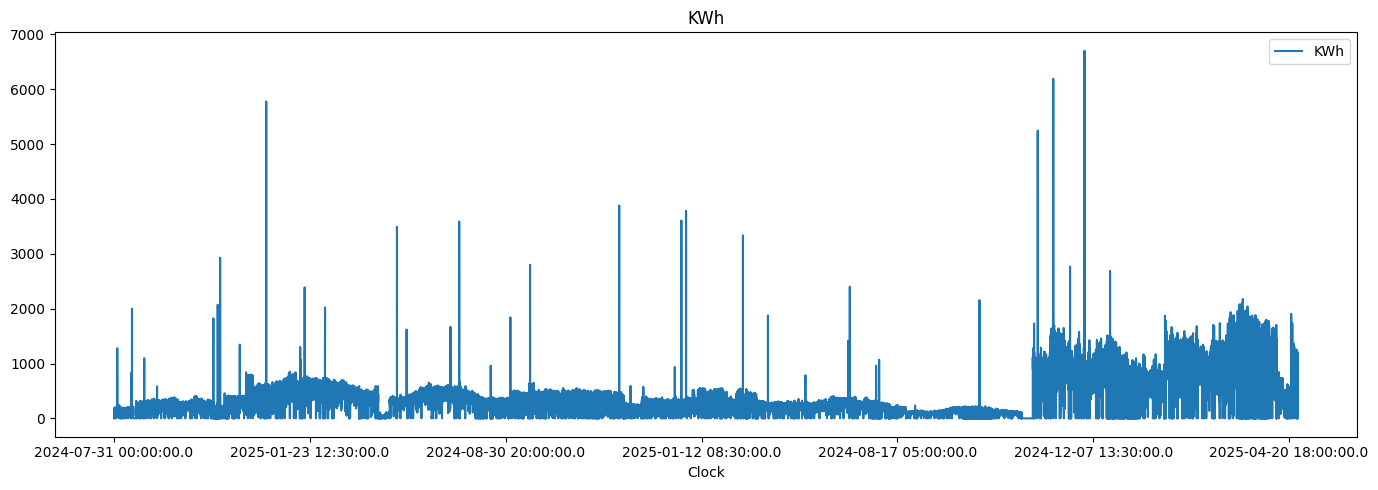

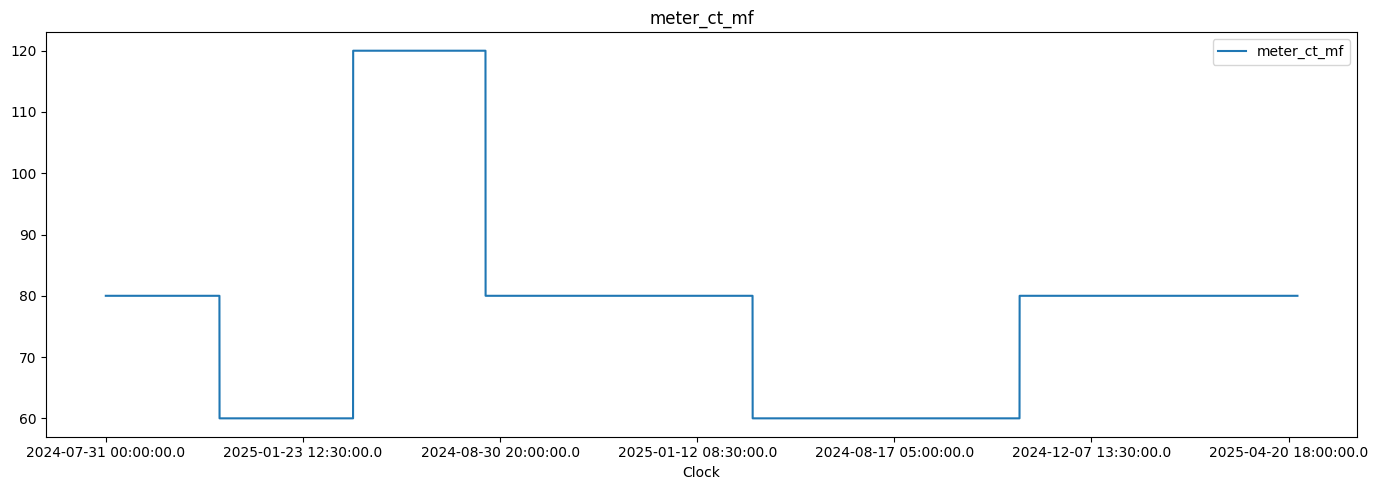

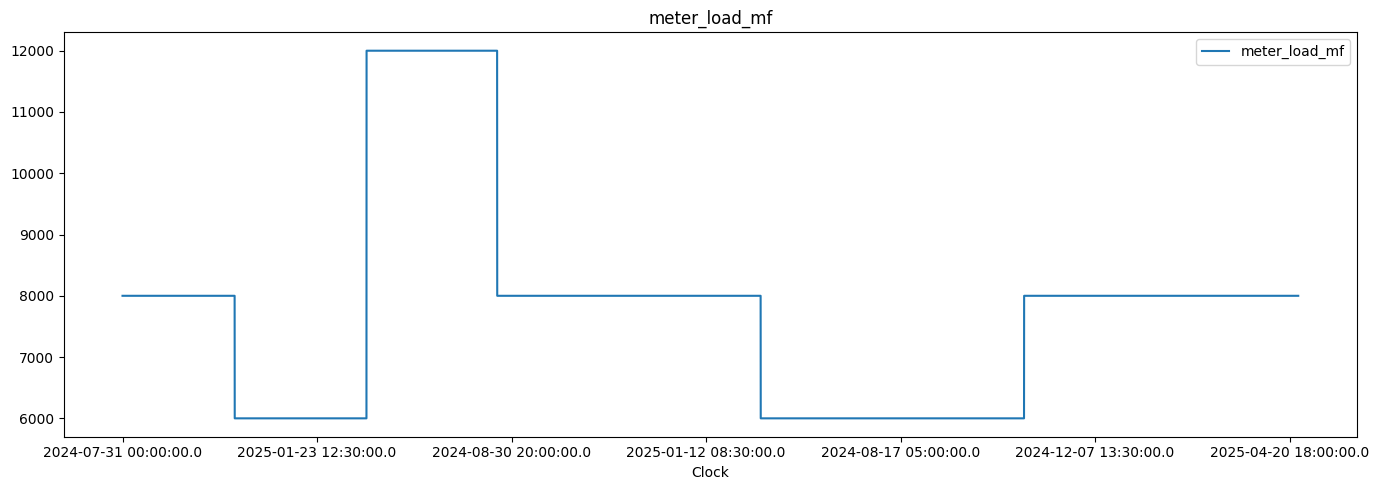

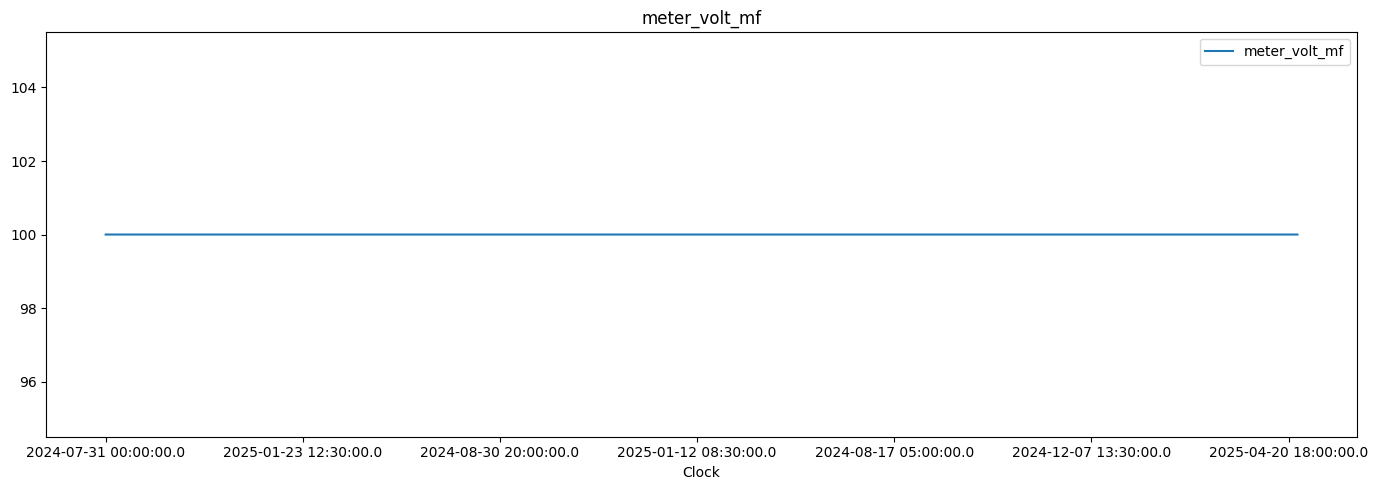

In [ ]:
for col in new_df.columns:
    if new_df[col].dtype == 'float64':
                new_df[col].plot(title=col, legend=True)
                plt.tight_layout()
                plt.show()

In [89]:
new_df.describe()

,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,meter_ct_mf,meter_load_mf,meter_volt_mf
count,120899.000000,120899.000000,120899.000000,120899.000000,120899.000000,120899.000000,120899.000000,120899.000000,120899.000000,120899.000000
mean,6090.501132,6055.765943,6171.938695,48.994701,49.745713,49.974638,400.939727,77.721735,7772.173467,100.000000
std,926.270970,924.073027,626.344526,39.838938,41.160282,43.133159,332.594361,17.523679,1752.367859,0.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6000.000000,100.000000
25%,5940.000000,5900.000000,5920.000000,23.200000,22.800000,24.000000,184.000000,60.000000,6000.000000,100.000000
50%,6190.000000,6150.000000,6220.000000,36.000000,36.000000,36.800000,300.000000,80.000000,8000.000000,100.000000
75%,6460.000000,6429.999500,6470.000000,58.800000,59.400000,56.800000,492.000000,80.000000,8000.000000,100.000000
max,11030.000000,11030.000000,11030.000000,265.600000,276.000000,297.600000,6704.000000,120.000000,12000.000000,100.000000


In [17]:
df[df['KWh']>df['KVAh']]

,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,KVAh,serial_no,location_id
Clock,,,,,,,,,,
2024-08-02 07:30:00.0,59.500000,59.300000,58.600000,0.860000,0.880000,0.850000,0.048000,0.014000,0010115006,305030100004
2024-08-25 07:30:00.0,59.000000,58.900000,58.200000,0.760000,0.770000,0.770000,0.042000,0.002000,0010115006,305030100004


In [ ]:


def voltage_current_load_validation():
	try:
		non_negative_cols = ['R_Voltage', 'Y_Voltage', 'B_Voltage','R_Current', 'Y_Current', 'B_Current', 'KWh', 'KVAh']
		voltage_cols = ['R_Voltage', 'Y_Voltage', 'B_Voltage']
		current_cols = ['R_Current', 'Y_Current', 'B_Current']

		# --- Condition 1 ---
		any_voltage_zero = (df[voltage_cols] == 0).any(axis=1)
		any_current_nonzero = (df[current_cols] != 0).any(axis=1)

		condition_1 = any_voltage_zero & any_current_nonzero

		# --- Condition 2 ---
		all_current_nonzero = (df[current_cols] != 0).all(axis=1)
		kwh_kvah_zero = (df['KWh'] == 0) & (df['KVAh'] == 0)

		condition_2 = all_current_nonzero & kwh_kvah_zero

		# --- Condition 3: No negatives ---
		no_negatives = (df[non_negative_cols] >= 0).all(axis=1)

		final_condition = (condition_1 | condition_2) & no_negatives
		filtered_df = df[final_condition].copy()
		filtered_df
	except Exception as e:
		print(f"Error in voltage_current_load_validation: {e}")
		return pd.DataFrame()


,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,KVAh,serial_no,location_id
Clock,,,,,,,,,,
2024-08-01 07:00:00.0,62.000000,61.600000,61.000000,0.300000,0.320000,0.320000,0.000000,0.000000,0010115005,305030100001
2024-08-11 12:00:00.0,62.400000,62.000000,61.400000,0.260000,0.310000,0.290000,0.000000,0.000000,0010115005,305030100001
2024-11-03 13:30:00.0,63.800000,64.299995,65.000000,0.270000,0.290000,0.300000,0.000000,0.000000,0010115005,305030100001
2024-11-14 14:30:00.0,63.600000,63.800000,64.299995,0.190000,0.210000,0.220000,0.000000,0.000000,0010115005,305030100001
2024-11-29 17:00:00.0,63.500000,63.200000,63.400000,0.300000,0.270000,0.320000,0.000000,0.000000,0010115005,305030100001
...,...,...,...,...,...,...,...,...,...,...
2025-04-24 14:30:00.0,0.000000,0.000000,57.300000,0.500000,0.490000,0.470000,0.014000,0.015000,0010115015,667bd5ff224136.74559203
2025-04-24 15:00:00.0,0.000000,0.000000,57.100000,0.230000,0.220000,0.220000,0.005000,0.005000,0010115015,667bd5ff224136.74559203
2025-04-24 15:30:00.0,0.000000,0.000000,56.300000,1.640000,1.690000,1.630000,0.030000,0.032000,0010115015,667bd5ff224136.74559203


In [26]:
df_cleaned = df[~final_condition].copy()
df_cleaned

,R_Voltage,Y_Voltage,B_Voltage,R_Current,Y_Current,B_Current,KWh,KVAh,serial_no,location_id
Clock,,,,,,,,,,
2024-07-31 00:00:00.0,58.000000,58.000000,57.200000,0.260000,0.250000,0.250000,0.013000,0.015000,0010115005,305030100001
2024-07-31 00:30:00.0,57.900000,57.900000,57.100000,0.260000,0.260000,0.250000,0.013000,0.015000,0010115005,305030100001
2024-07-31 01:00:00.0,57.800000,57.700000,56.900000,0.260000,0.250000,0.240000,0.013000,0.015000,0010115005,305030100001
2024-07-31 01:30:00.0,58.100000,57.900000,57.200000,0.250000,0.250000,0.240000,0.012000,0.014000,0010115005,305030100001
2024-07-31 02:00:00.0,58.000000,57.900000,57.200000,0.250000,0.240000,0.240000,0.013000,0.015000,0010115005,305030100001
...,...,...,...,...,...,...,...,...,...,...
2025-05-09 09:00:00.0,55.600000,55.600000,55.000000,1.610000,1.690000,1.590000,0.133000,0.136000,0010115015,667bd5ff224136.74559203
2025-05-09 09:30:00.0,56.100000,56.300000,55.600000,0.200000,0.210000,0.200000,0.017000,0.017000,0010115015,667bd5ff224136.74559203
2025-05-09 10:00:00.0,54.900000,55.000000,54.300000,1.850000,1.830000,1.790000,0.147000,0.150000,0010115015,667bd5ff224136.74559203


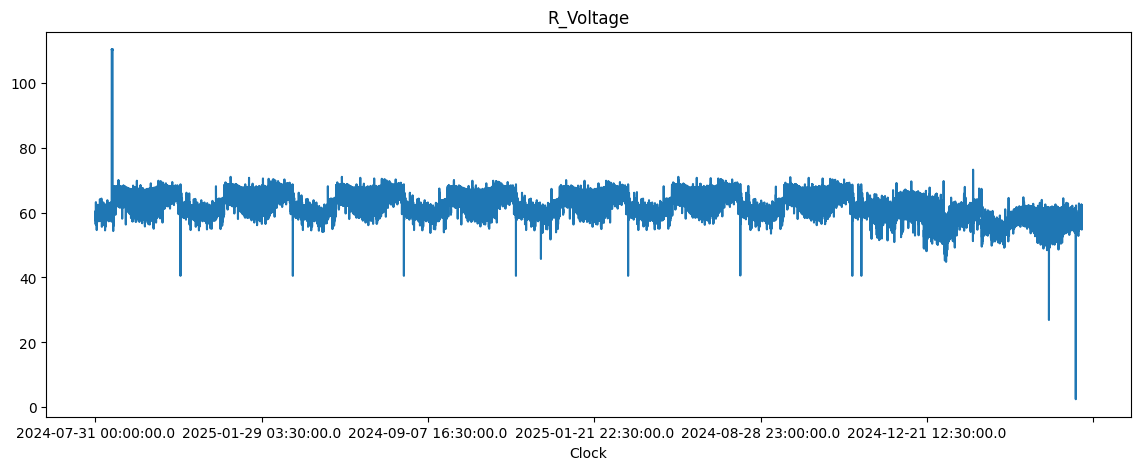

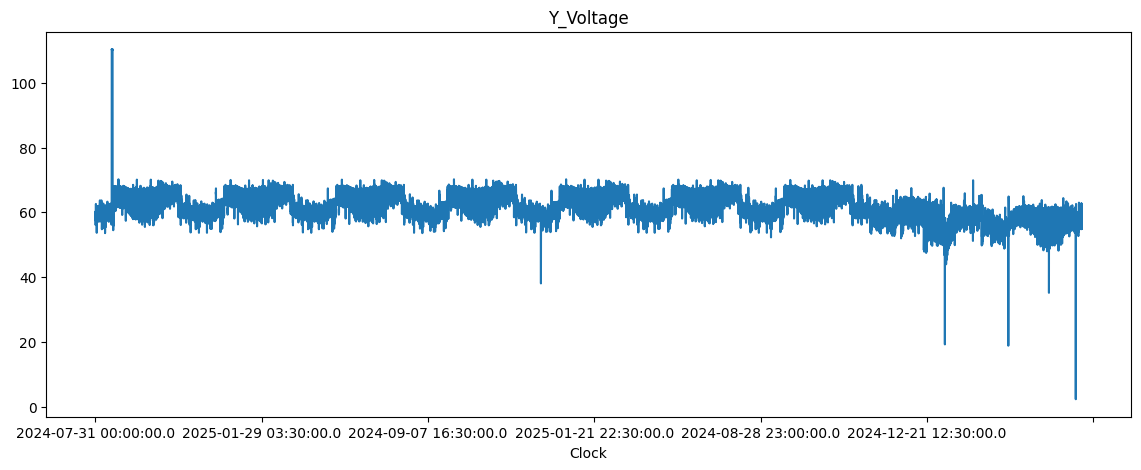

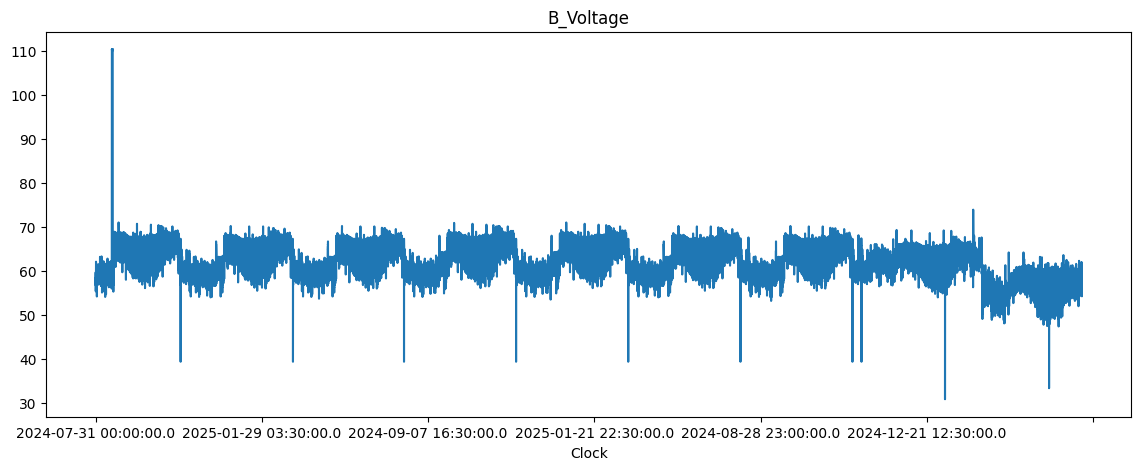

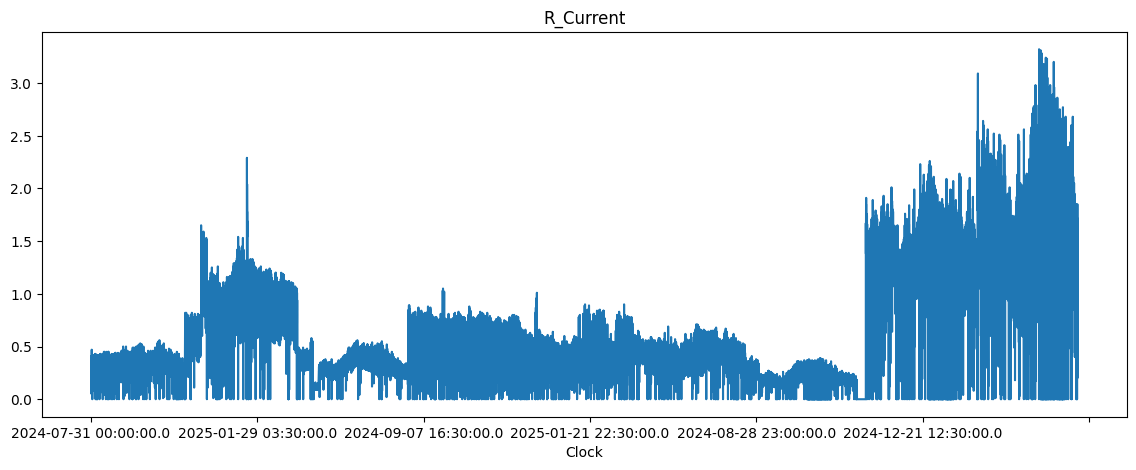

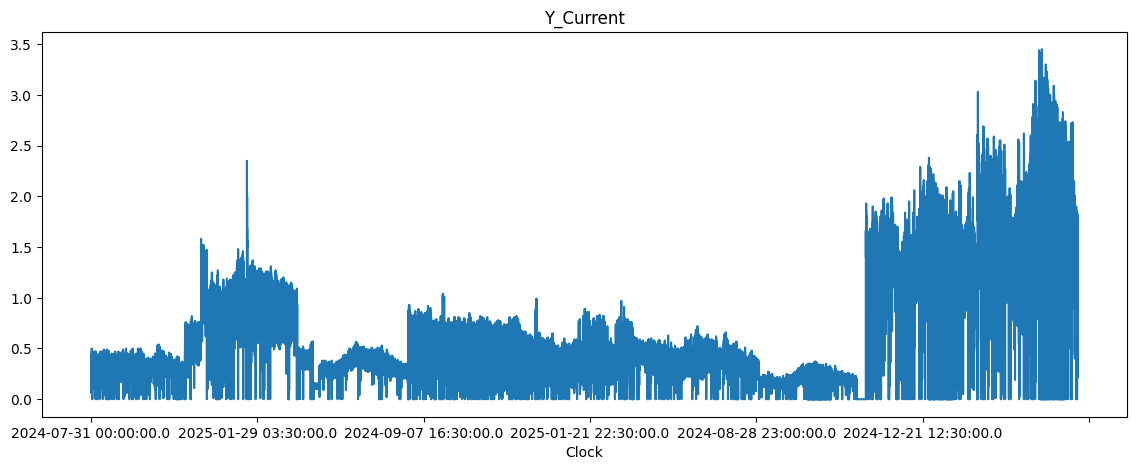

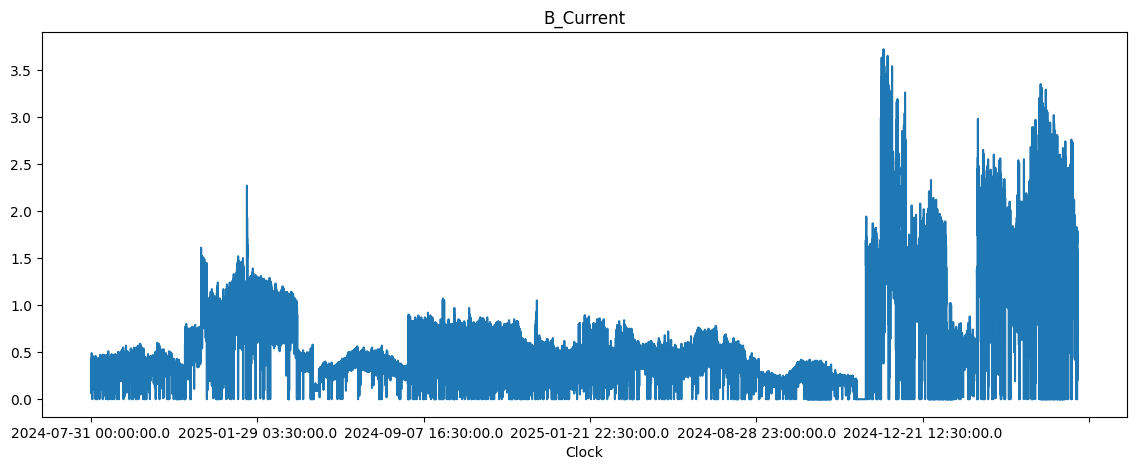

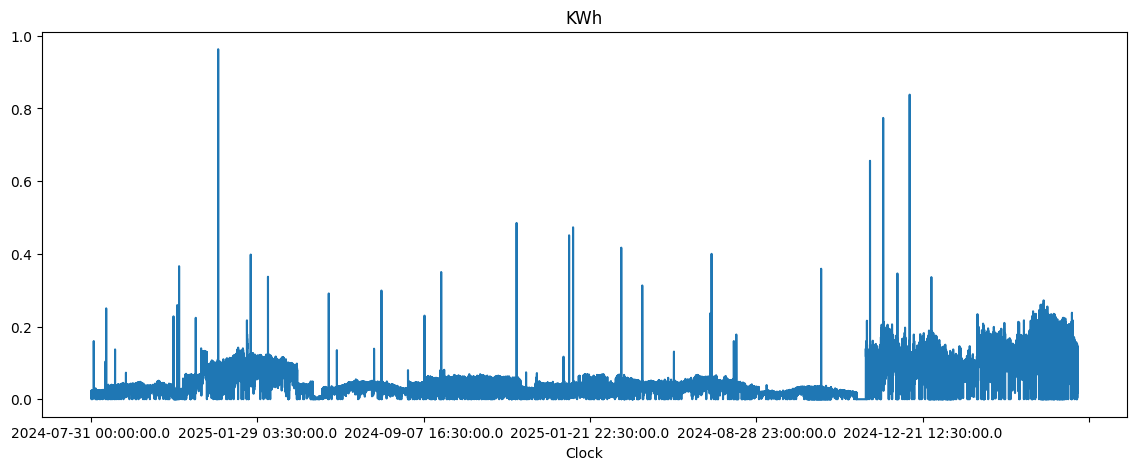

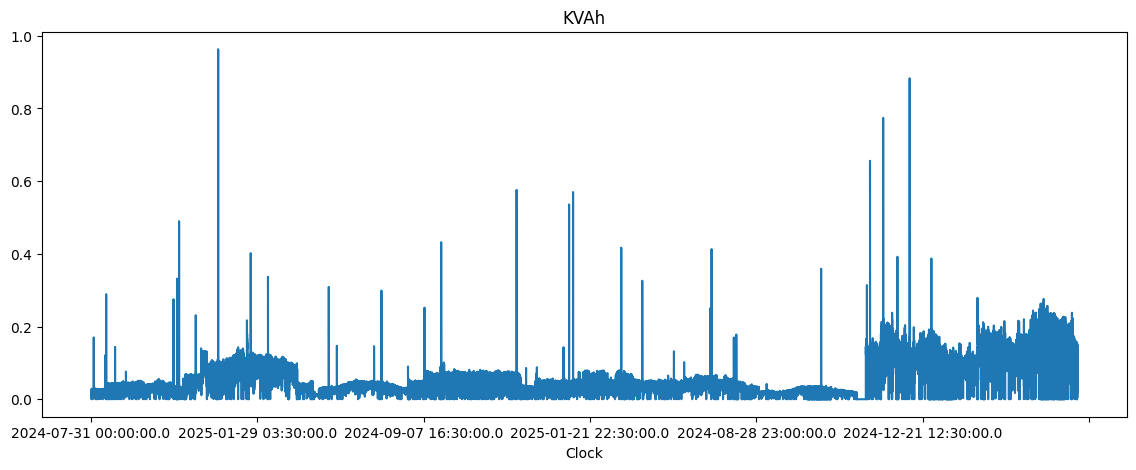

In [25]:
for col in df.columns:
	if df[col].dtype != 'object':
		df[col].plot()
		plt.title(col)
		plt.show()